In [28]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.wkt import loads 
import fiona
%matplotlib inline 

In [5]:
#Raw approach in creating points with Geopandas
GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')]) 

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

In [8]:
#List of point objects
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])

In [11]:
# using a CRS store, can reproject into other projections in this manner
gs.crs = {'init': 'epsg:4326'}

(44.8, 47.7)

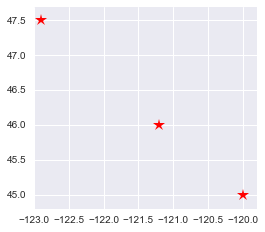

In [12]:
# Generic plot
gs.plot(marker='*', color='red', markersize=12, figsize=(4,4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7])

In [14]:
# Using dictionaries as data input
data = {'name': ['a', 'b', 'c'],
       'lat': [45, 46, 47.5],
       'lon': [-120, -121.2, -122.9]}

In [16]:
# List comprehension to zip together lats and longs for point shapes
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]

In [17]:
# Finally create the geoseries from the list created
gs = GeoSeries(geometry, index=data['name'])

In [21]:
# Compare to Pandas Dataframe
df = pd.DataFrame(data)

In [22]:
geometry2 = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf2 = GeoDataFrame(df, geometry=geometry2)

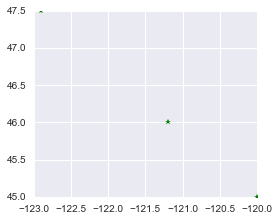

In [25]:
gdf2.plot(marker='*', color='green', markersize=6, figsize=(4,4))

In [27]:
# Load in some real data
data_pth = "../data"
oceans = gpd.read_file(os.path.join(data_pth, "oceans.shp"))

IOError: no such file or directory: '../data/oceans.shp'